In [2]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('Personal_Finance_Dataset.csv')

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())


         Date                   Transaction Description      Category  \
0  2020-01-02                               Score each.  Food & Drink   
1  2020-01-02                       Quality throughout.     Utilities   
2  2020-01-04        Instead ahead despite measure ago.          Rent   
3  2020-01-05  Information last everything thank serve.    Investment   
4  2020-01-13              Future choice whatever from.  Food & Drink   

    Amount     Type  
0  1485.69  Expense  
1  1475.58  Expense  
2  1185.08  Expense  
3  2291.00   Income  
4  1126.88  Expense  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1500 non-null   object 
 1   Transaction Description  1500 non-null   object 
 2   Category                 1500 non-null   object 
 3   Amount                   1500 non-null   float64

In [6]:
import pandas as pd

def load_and_preprocess(file_path):
    # Load CSV
    df = pd.read_csv(file_path)

    # Rename columns for consistency
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

    # Convert date
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Normalize text
    df['transaction_description'] = df['transaction_description'].str.lower().str.strip()
    df['category'] = df['category'].str.lower().str.strip()
    df['type'] = df['type'].str.lower().str.strip()

    # Add date features
    df['month'] = df['date'].dt.to_period('M').astype(str)
    df['weekday'] = df['date'].dt.day_name()

    # Drop duplicates if any
    df = df.drop_duplicates()

    return df

# Example usage
if __name__ == "__main__":
    data_path = "data/Personal_Finance_Dataset.csv"
    df = load_and_preprocess(data_path)
    print(df.head())
    print(df.dtypes)


        date                   transaction_description      category   amount  \
0 2020-01-02                               score each.  food & drink  1485.69   
1 2020-01-02                       quality throughout.     utilities  1475.58   
2 2020-01-04        instead ahead despite measure ago.          rent  1185.08   
3 2020-01-05  information last everything thank serve.    investment  2291.00   
4 2020-01-13              future choice whatever from.  food & drink  1126.88   

      type    month   weekday  
0  expense  2020-01  Thursday  
1  expense  2020-01  Thursday  
2  expense  2020-01  Saturday  
3   income  2020-01    Sunday  
4  expense  2020-01    Monday  
date                       datetime64[ns]
transaction_description            object
category                           object
amount                            float64
type                               object
month                              object
weekday                            object
dtype: object


In [8]:
import pandas as pd

def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)

    # Rename columns to standard format
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

    # Convert date to datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Drop rows with nulls
    df.dropna(subset=['transaction_description', 'category'], inplace=True)

    return df

# Load your data
df = load_and_preprocess("data/Personal_Finance_Dataset.csv")
df.head()


,date,transaction_description,category,amount,type
0,2020-01-02,Score each.,Food & Drink,1485.69,Expense
1,2020-01-02,Quality throughout.,Utilities,1475.58,Expense
2,2020-01-04,Instead ahead despite measure ago.,Rent,1185.08,Expense
3,2020-01-05,Information last everything thank serve.,Investment,2291.00,Income
4,2020-01-13,Future choice whatever from.,Food & Drink,1126.88,Expense


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib
import os

# Define training function
def train_categorization_model(df):
    X = df['transaction_description']
    y = df['category']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english')),
        ('clf', LogisticRegression(max_iter=200))
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))

    # Save model
    os.makedirs("ml_models", exist_ok=True)
    joblib.dump(pipe, "ml_models/categorization_model.pkl")
    print("✅ Model saved at: ml_models/categorization_model.pkl")

# Train the model
train_categorization_model(df)


📊 Classification Report:
                   precision    recall  f1-score   support

   Entertainment       0.04      0.03      0.04        33
    Food & Drink       0.14      0.13      0.13        31
Health & Fitness       0.10      0.10      0.10        31
      Investment       0.17      0.11      0.13        28
           Other       0.06      0.04      0.05        24
            Rent       0.08      0.15      0.10        26
          Salary       0.13      0.05      0.08        37
        Shopping       0.06      0.08      0.07        25
          Travel       0.09      0.15      0.11        27
       Utilities       0.17      0.16      0.16        38

        accuracy                           0.10       300
       macro avg       0.10      0.10      0.10       300
    weighted avg       0.11      0.10      0.10       300

✅ Model saved at: ml_models/categorization_model.pkl


✅ Model saved successfully at: ml_models/spending_forecast_model.pkl


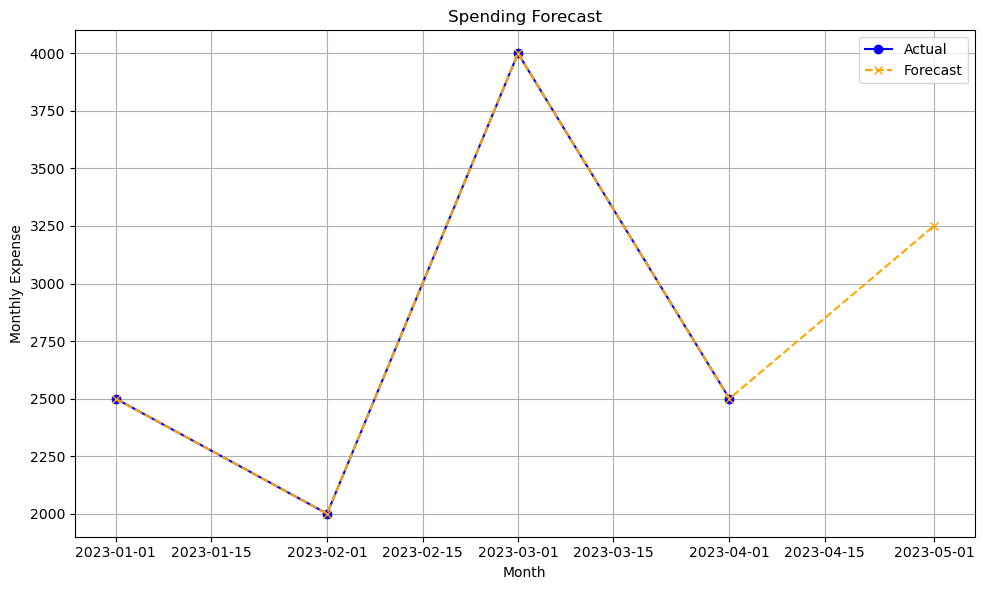

📅 Forecast for Next Month: ₹3250.00


In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df):
    df.columns = df.columns.str.strip()

    # Ensure date conversion works with a consistent format (adjust as needed)
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Handling errors with 'coerce' for invalid dates
    df = df.dropna(subset=["Date"])

    # Filter only Expense entries
    df = df[df["Type"] == "Expense"]

    # Group by month and sum the expenses
    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    # Reset index to prepare for the model
    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    # Features and target variable
    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    # Model training using Linear Regression
    model = LinearRegression()
    model.fit(X, y)

    # Forecast for next month
    next_month_index = pd.DataFrame({"MonthIndex": [len(monthly_expense_df)]})
    forecast = model.predict(next_month_index)[0]

    # Save the model to a file
    os.makedirs("ml_models", exist_ok=True)
    model_path = "ml_models/spending_forecast_model.pkl"
    joblib.dump(model, model_path)

    if os.path.exists(model_path):
        print(f"✅ Model saved successfully at: {model_path}")
    else:
        print("❌ Model save failed.")

    # Plot actual vs forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title("Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast

# ✅ ADD THIS TO ACTUALLY RUN THE FUNCTION!
if __name__ == "__main__":
    # Example DataFrame (replace this with your actual CSV or input)
    data = {
        "Date": ["2023-01-01", "2023-01-15", "2023-02-01", "2023-03-10", "2023-03-20", "2023-04-10"],
        "Type": ["Expense", "Expense", "Expense", "Expense", "Expense", "Expense"],
        "Amount": [1000, 1500, 2000, 1800, 2200, 2500]
    }
    df = pd.DataFrame(data)
    
    # Call the forecast model function
    train_spending_forecast_model(df)


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  Navya


📂 Loading existing data from: user_data/Navya_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  07-07-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Food
💰 Amount:  56
📝 Comment (optional):  none
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  07-04-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Travel
💰 Amount:  67
📝 Comment (optional):  no
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/Navya_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Travel    436.0
Bills     378.0
Food      280.0
Name: Amount, dtype: float64


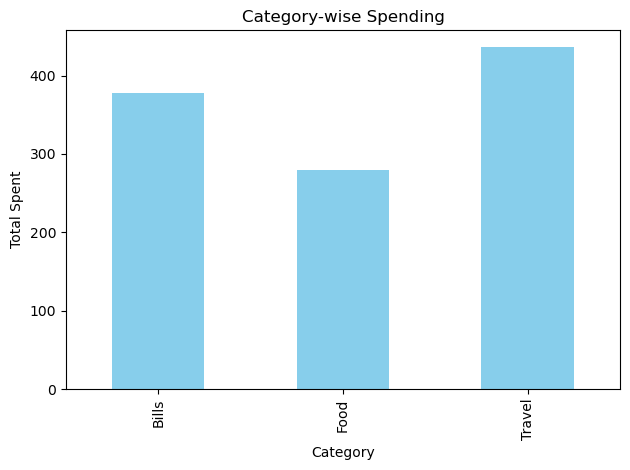

✅ Model saved at: ml_models/Navya/spending_forecast_model.pkl


C:\Users\ramya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


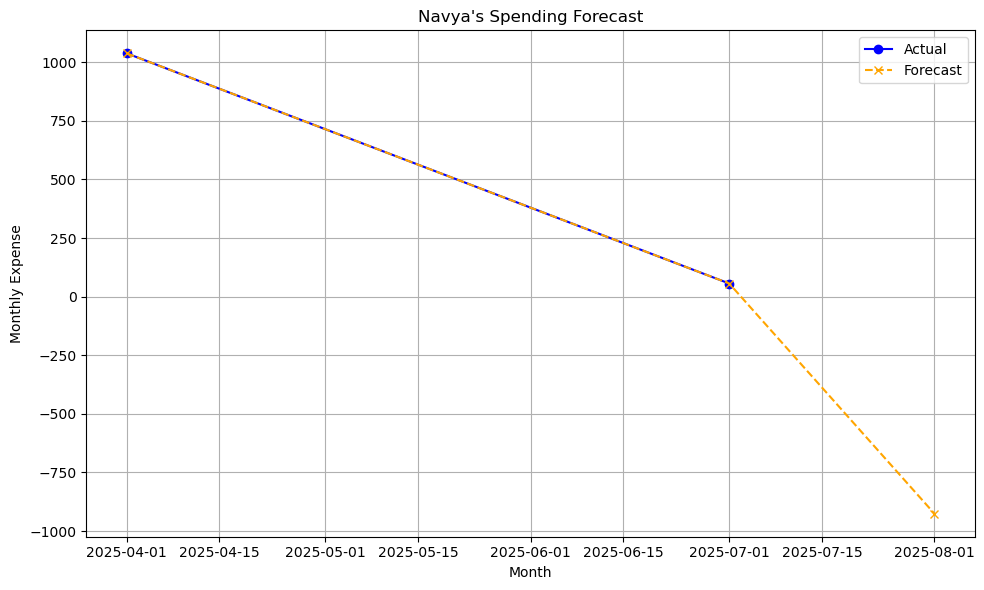

📅 Forecast for Next Month: ₹-926.00
📈 Model Accuracy (R² Score): 100.00%


In [169]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # ✅ NEW: Accuracy import
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()

    # 🔧 Robust datetime conversion
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    model = LinearRegression()
    model.fit(X, y)

    # ✅ Accuracy (R² Score)
    y_pred = model.predict(X)
    if len(y) >= 2:
        accuracy = r2_score(y, y_pred) * 100
    else:
        accuracy = None

    # 🔮 Forecast for next month
    next_month_index = [[len(monthly_expense_df)]]
    forecast = model.predict(next_month_index)[0]

    # 💾 Save model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    if accuracy is not None:
        print(f"📈 Model Accuracy (R² Score): {accuracy:.2f}%")
    else:
        print("ℹ️ Not enough data to compute model accuracy.")

    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()
NNlable to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  Bhavya


⚠️ No previous data found.

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  09-05-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Travel
💰 Amount:  56
📝 Comment (optional):  none


C:\Users\ramya\AppData\Local\Temp\ipykernel_3780\2157559864.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({"Date": date, "Type": type_, "Category": category, "Amount": amount, "Comment": comment}, ignore_index=True)


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  06-05-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Travel
💰 Amount:  67
📝 Comment (optional):  none
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/Bhavya_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Travel    123.0
Name: Amount, dtype: float64


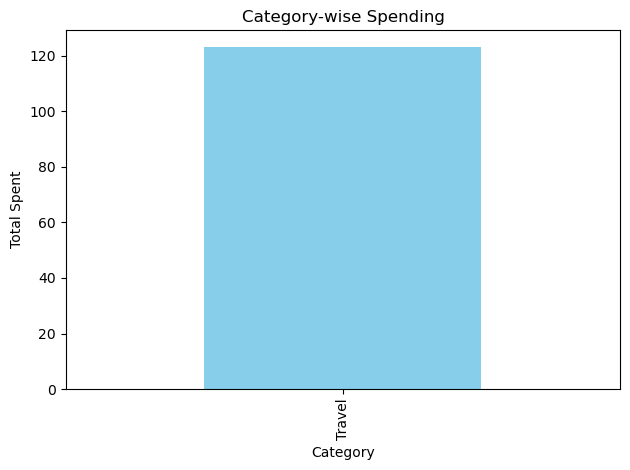

✅ Model saved at: ml_models/Bhavya/spending_forecast_model.pkl


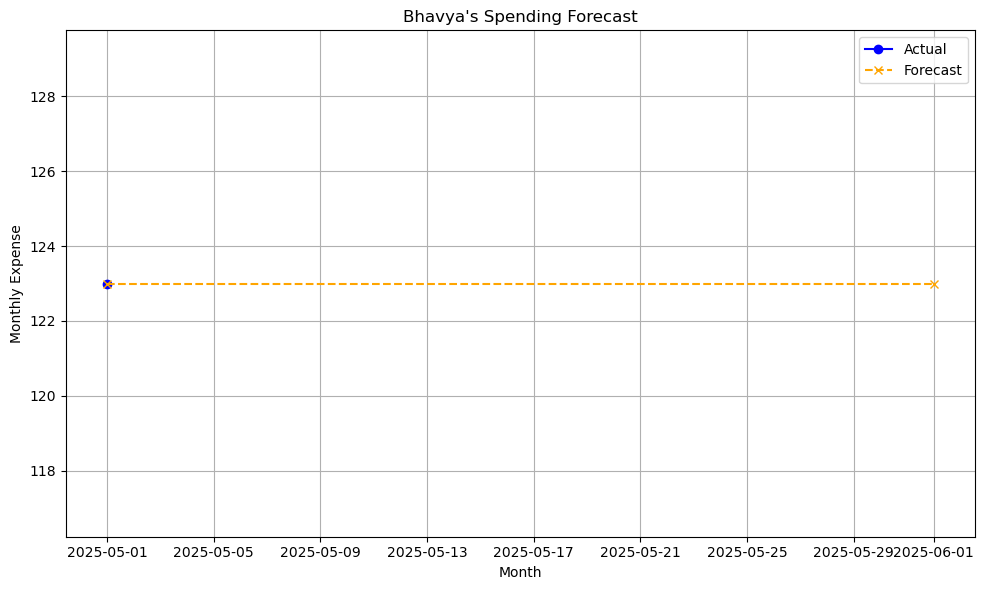

📅 Forecast for Next Month: ₹123.00


In [173]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()

    # 🔧 Robust datetime conversion with a specified format
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])

    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    model = LinearRegression()
    model.fit(X, y)

    next_month_index = pd.DataFrame([[len(monthly_expense_df)]], columns=["MonthIndex"])
    forecast = model.predict(next_month_index)[0]

    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()
        df = df._append({"Date": date, "Type": type_, "Category": category, "Amount": amount, "Comment": comment}, ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)
        train_spending_forecast_model(df, user)
    else:
        print("⚠️ No data available to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  ec


📂 Loading existing data from: user_data/ec_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  09-03-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Food
💰 Amount:  45
📝 Comment (optional):  no
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/ec_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Travel    67.0
Food      45.0
Name: Amount, dtype: float64


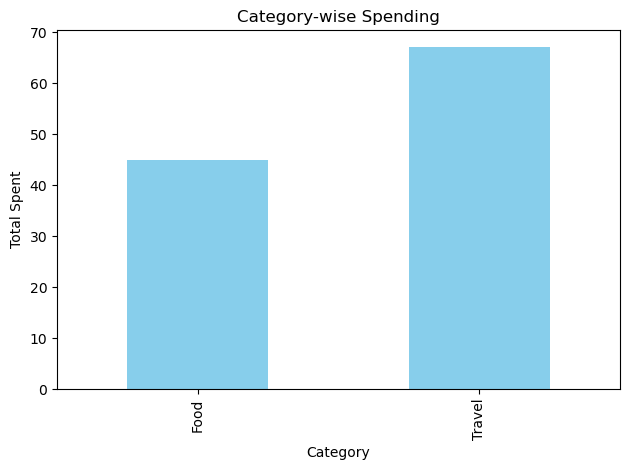

✅ Model saved at: ml_models/ec/spending_forecast_model.pkl


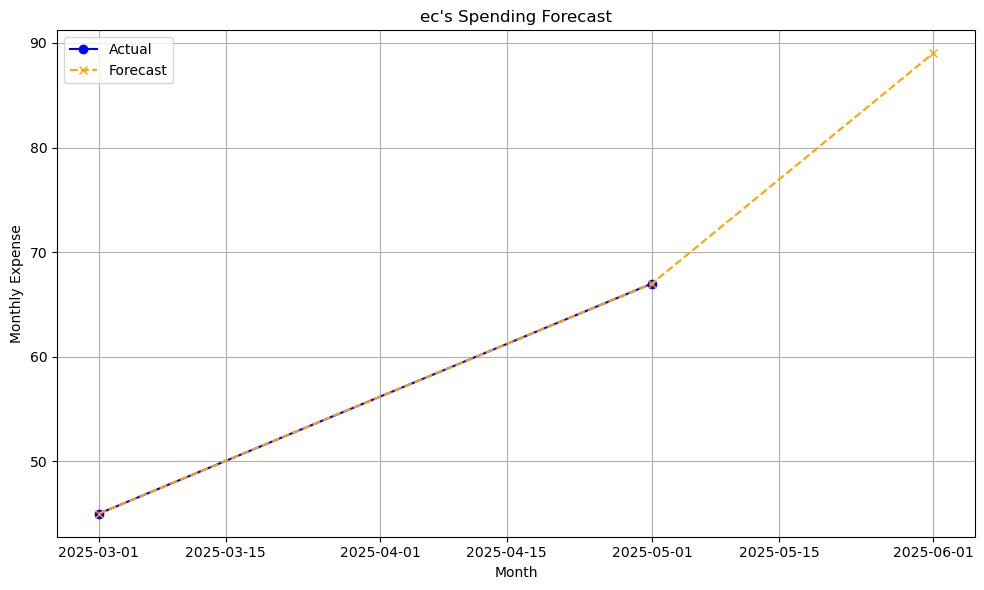

📅 Forecast for Next Month: ₹89.00


In [185]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    model = LinearRegression()
    model.fit(X, y)

    next_month_index = pd.DataFrame([[len(monthly_expense_df)]], columns=["MonthIndex"])
    forecast = model.predict(next_month_index)[0]

    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()

        new_row = pd.DataFrame([{
            "Date": date,
            "Type": type_,
            "Category": category,
            "Amount": amount,
            "Comment": comment
        }])

        # ✅ Warning-free merge logic
        if df.empty:
            df = new_row
        else:
            df = pd.concat([df, new_row], ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)
        train_spending_forecast_model(df, user)
    else:
        print("⚠️ No data available to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  ec


📂 Loading existing data from: user_data/ec_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  06-01-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Food
💰 Amount:  45
📝 Comment (optional):  nonr
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/ec_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Food      90.0
Travel    67.0
Bills     56.0
Name: Amount, dtype: float64


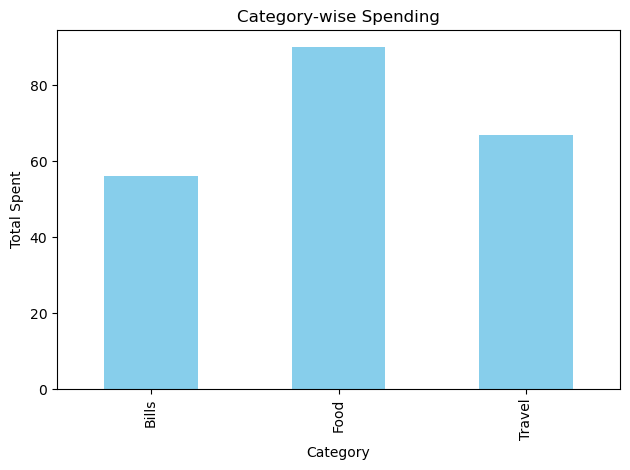

📊 Model Accuracy (R² Score): 0.8909
✅ Model saved at: ml_models/ec/spending_forecast_model.pkl


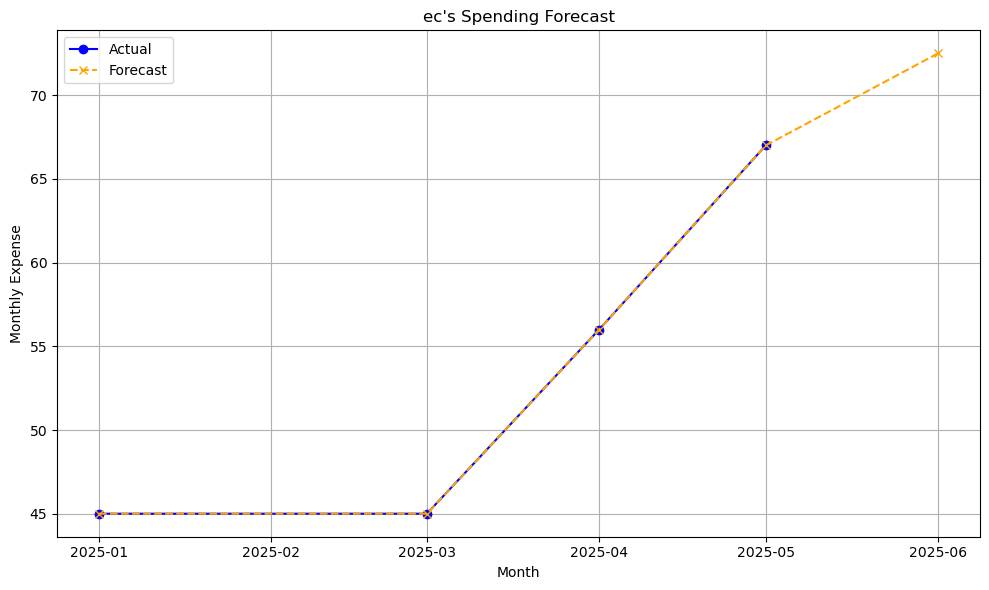

📅 Forecast for Next Month: ₹72.50


In [189]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])
    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))

    X = monthly_expense_df[["MonthIndex"]]
    y = monthly_expense_df["Amount"]

    model = LinearRegression()
    model.fit(X, y)

    # ✅ Print model accuracy (R² Score)
    r2_score = model.score(X, y)
    print(f"📊 Model Accuracy (R² Score): {r2_score:.4f}")

    next_month_index = pd.DataFrame([[len(monthly_expense_df)]], columns=["MonthIndex"])
    forecast = model.predict(next_month_index)[0]

    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()

        new_row = pd.DataFrame([{
            "Date": date,
            "Type": type_,
            "Category": category,
            "Amount": amount,
            "Comment": comment
        }])

        # ✅ Warning-free merge logic
        if df.empty:
            df = new_row
        else:
            df = pd.concat([df, new_row], ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)
        train_spending_forecast_model(df, user)
    else:
        print("⚠️ No data available to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  Navya


📂 Loading existing data from: user_data/Navya_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  05-04-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Food
💰 Amount:  56
📝 Comment (optional):  for 
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  05-04-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Bills
💰 Amount:  45
📝 Comment (optional):  bill
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/Navya_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Bills     311.0
Travel    246.0
Food      179.0
Name: Amount, dtype: float64


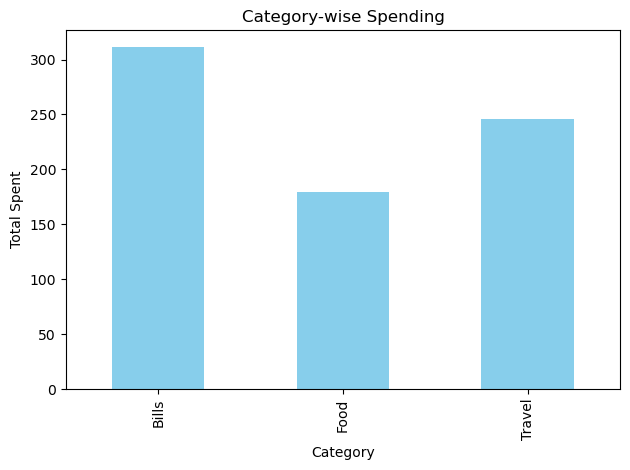

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by RandomForestRegressor.

In [163]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()

    # 🔧 Robust datetime conversion with a specified format
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])

    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting.")
        return None

    # Group by month and sum expenses
    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter

    # Add previous month's expense as a feature
    monthly_expense_df["PrevMonthExpense"] = monthly_expense_df["Amount"].shift(1)
    monthly_expense_df = monthly_expense_df.dropna()  # Drop rows with NaN values in 'PrevMonthExpense'

    X = monthly_expense_df[["MonthIndex", "Month", "Year", "Quarter", "PrevMonthExpense"]]
    y = monthly_expense_df["Amount"]

    # Using Random Forest for better predictions
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Forecast the next month's expense
    next_month_index = pd.DataFrame([[
        len(monthly_expense_df), 
        (monthly_expense_df["Month"].max() % 12) + 1,  # Predicting for the next month
        monthly_expense_df["Year"].max(),  # Assuming it's the same year
        (monthly_expense_df["Quarter"].max() % 4) + 1,  # Assuming next quarter
        monthly_expense_df["Amount"].iloc[-1]  # Last month's expense
    ]], columns=["MonthIndex", "Month", "Year", "Quarter", "PrevMonthExpense"])

    forecast = model.predict(next_month_index)[0]

    # Predicting the model's accuracy using Mean Squared Error (MSE) and R² score
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"📊 Model Accuracy: MSE = {mse:.2f}, R² = {r2:.2f}")

    # Save model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()
        df = df._append({"Date": date, "Type": type_, "Category": category, "Amount": amount, "Comment": comment}, ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)

        # Calling the function to train the spending forecast model
        forecast = train_spending_forecast_model(df, user)

        # Optional: Display the forecast after training
        if forecast is not None:
            print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    else:
        print("⚠️ No data available to process.")


👤 Welcome to Smart Expense Tracker


🆔 Enter your name:  Navya


📂 Loading existing data from: user_data/Navya_transactions.csv

📥 Add new transactions (or type 'done' to finish):


📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  05-04-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Food
💰 Amount:  45
📝 Comment (optional):  none
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  9-04-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Bills
💰 Amount:  67
📝 Comment (optional):  none
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  8-04-2025
💸 Type (Expense/Income):  Expense
📂 Category (e.g., Food, Bills, Travel):  Travel
💰 Amount:  56
📝 Comment (optional):  none
📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done':  done


🗃️ All transactions saved to: user_data/Navya_transactions.csv

📂 Category-wise Expense Breakdown:
Category
Bills     378.0
Travel    302.0
Food      224.0
Name: Amount, dtype: float64


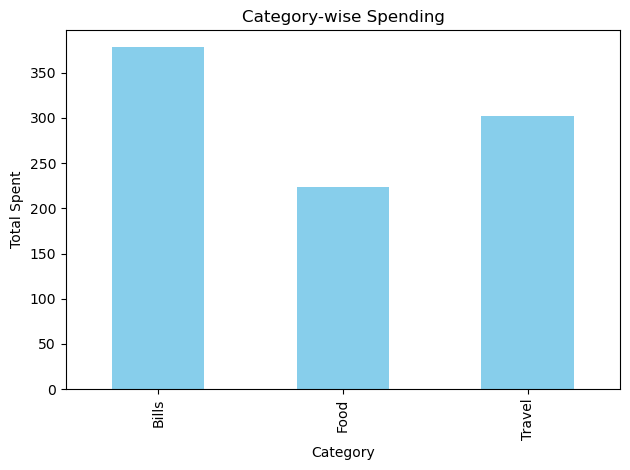

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by RandomForestRegressor.

In [165]:
# 📦 Required Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# 🧠 Spending Forecast Model Function
def train_spending_forecast_model(df, user):
    df.columns = df.columns.str.strip()

    # 🔧 Robust datetime conversion with a specified format
    df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
    df = df.dropna(subset=["Date"])

    df = df[df["Type"].str.lower() == "expense"]

    if df.empty:
        print("⚠️ No 'Expense' entries found for forecasting. Using fallback dataset.")
        df = pd.read_csv('Personal_Finance_Dataset.csv')  # Load fallback dataset
        # Ensure to preprocess the fallback dataset if necessary
        df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors="coerce")
        df = df.dropna(subset=["Date"])
        df = df[df["Type"].str.lower() == "expense"]

        if df.empty:
            print("⚠️ Fallback dataset also contains no 'Expense' entries.")
            return None

    # Group by month and sum expenses
    monthly_expense = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
    monthly_expense.index = monthly_expense.index.to_timestamp()
    monthly_expense = monthly_expense.sort_index()

    monthly_expense_df = monthly_expense.reset_index()
    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    monthly_expense_df["Month"] = monthly_expense_df["Date"].dt.month
    monthly_expense_df["Year"] = monthly_expense_df["Date"].dt.year
    monthly_expense_df["Quarter"] = monthly_expense_df["Date"].dt.quarter

    # Add previous month's expense as a feature
    monthly_expense_df["PrevMonthExpense"] = monthly_expense_df["Amount"].shift(1)
    monthly_expense_df = monthly_expense_df.dropna()  # Drop rows with NaN values in 'PrevMonthExpense'

    X = monthly_expense_df[["MonthIndex", "Month", "Year", "Quarter", "PrevMonthExpense"]]
    y = monthly_expense_df["Amount"]

    # Using Random Forest for better predictions
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Forecast the next month's expense
    next_month_index = pd.DataFrame([[
        len(monthly_expense_df), 
        (monthly_expense_df["Month"].max() % 12) + 1,  # Predicting for the next month
        monthly_expense_df["Year"].max(),  # Assuming it's the same year
        (monthly_expense_df["Quarter"].max() % 4) + 1,  # Assuming next quarter
        monthly_expense_df["Amount"].iloc[-1]  # Last month's expense
    ]], columns=["MonthIndex", "Month", "Year", "Quarter", "PrevMonthExpense"])

    forecast = model.predict(next_month_index)[0]

    # Predicting the model's accuracy using Mean Squared Error (MSE) and R² score
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"📊 Model Accuracy: MSE = {mse:.2f}, R² = {r2:.2f}")

    # Save model
    os.makedirs(f"ml_models/{user}", exist_ok=True)
    model_path = f"ml_models/{user}/spending_forecast_model.pkl"
    joblib.dump(model, model_path)
    print(f"✅ Model saved at: {model_path}")

    # 📈 Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_expense_df["Date"], y, marker='o', label="Actual", color="blue")
    plt.plot(
        monthly_expense_df["Date"].tolist() + [monthly_expense_df["Date"].max() + pd.DateOffset(months=1)],
        list(y) + [forecast],
        linestyle='--',
        marker='x',
        label="Forecast",
        color="orange"
    )
    plt.xlabel("Month")
    plt.ylabel("Monthly Expense")
    plt.title(f"{user}'s Spending Forecast")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    return forecast


# 📊 Category-wise Breakdown
def show_category_breakdown(df):
    if "Category" not in df.columns:
        print("⚠️ No category data found.")
        return
    print("\n📂 Category-wise Expense Breakdown:")
    category_summary = df[df["Type"].str.lower() == "expense"].groupby("Category")["Amount"].sum()
    print(category_summary.sort_values(ascending=False))
    category_summary.plot(kind="bar", title="Category-wise Spending", color="skyblue")
    plt.ylabel("Total Spent")
    plt.tight_layout()
    plt.show()


# 🔁 Load existing CSV
def load_existing_csv(user):
    csv_path = f"user_data/{user}_transactions.csv"
    if os.path.exists(csv_path):
        print(f"📂 Loading existing data from: {csv_path}")
        return pd.read_csv(csv_path)
    else:
        print("⚠️ No previous data found.")
        return pd.DataFrame(columns=["Date", "Type", "Category", "Amount", "Comment"])


# 🚀 Main Flow
if __name__ == "__main__":
    print("👤 Welcome to Smart Expense Tracker")
    user = input("🆔 Enter your name: ").strip().replace(" ", "_")

    df = load_existing_csv(user)

    print("\n📥 Add new transactions (or type 'done' to finish):")
    while True:
        date = input("📅 Date (DD-MM-YYYY or YYYY-MM-DD) or 'done': ").strip()
        if date.lower() == "done":
            break

        try:
            pd.to_datetime(date, dayfirst=True)  # Validate date input
        except Exception:
            print("❌ Invalid date format. Please try again.")
            continue

        type_ = input("💸 Type (Expense/Income): ").strip()
        if type_.lower() not in ["expense", "income"]:
            print("❌ Invalid type. Please enter 'Expense' or 'Income'.")
            continue

        category = input("📂 Category (e.g., Food, Bills, Travel): ").strip()

        try:
            amount = float(input("💰 Amount: ").strip())
        except ValueError:
            print("❌ Invalid amount. Try again.")
            continue

        comment = input("📝 Comment (optional): ").strip()
        df = df._append({"Date": date, "Type": type_, "Category": category, "Amount": amount, "Comment": comment}, ignore_index=True)

    # 💾 Save CSV
    if not df.empty:
        os.makedirs("user_data", exist_ok=True)
        csv_path = f"user_data/{user}_transactions.csv"
        df.to_csv(csv_path, index=False)
        print(f"🗃️ All transactions saved to: {csv_path}")

        show_category_breakdown(df)

        # Calling the function to train the spending forecast model
        forecast = train_spending_forecast_model(df, user)

        # Optional: Display the forecast after training
        if forecast is not None:
            print(f"📅 Forecast for Next Month: ₹{forecast:.2f}")
    else:
        print("⚠️ No data available to process.")


In [171]:
def train_spending_forecast_model(df, user):
    df["Date"] = pd.to_datetime(df["Date"])
    df = df[df["Type"] == "Expense"]

    # Group by Month-Year
    df["Month"] = df["Date"].dt.month
    df["Year"] = df["Date"].dt.year

    monthly_expense_df = df.groupby(["Year", "Month"]).agg({"Amount": "sum"}).reset_index()

    if len(monthly_expense_df) < 2:
        print("❗ Not enough monthly expense data to train forecast model.")
        return None

    monthly_expense_df["MonthIndex"] = range(len(monthly_expense_df))
    monthly_expense_df["Quarter"] = pd.to_datetime(monthly_expense_df[["Year", "Month"]].assign(DAY=1)).dt.quarter

    monthly_expense_df["PrevMonthExpense"] = monthly_expense_df["Amount"].shift(1)
    monthly_expense_df.dropna(inplace=True)

    X = monthly_expense_df[["MonthIndex", "Month", "Year", "Quarter", "PrevMonthExpense"]]
    y = monthly_expense_df["Amount"]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Predict next month's spending
    next_month_index = pd.DataFrame([[...]], columns=[...])  # Your forecasting logic
    forecast = model.predict(next_month_index)[0]

    print(f"📈 Forecasted next month's expense: ₹{forecast:.2f}")
    return forecast


In [191]:
import sys
sys.executable


'C:\\Users\\ramya\\anaconda3\\python.exe'